In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit.circuit import Delay

import matplotlib.pyplot as plt
import math
import numpy as np

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.shor_code_circuit import ShorCodeCircuit
from functions import *


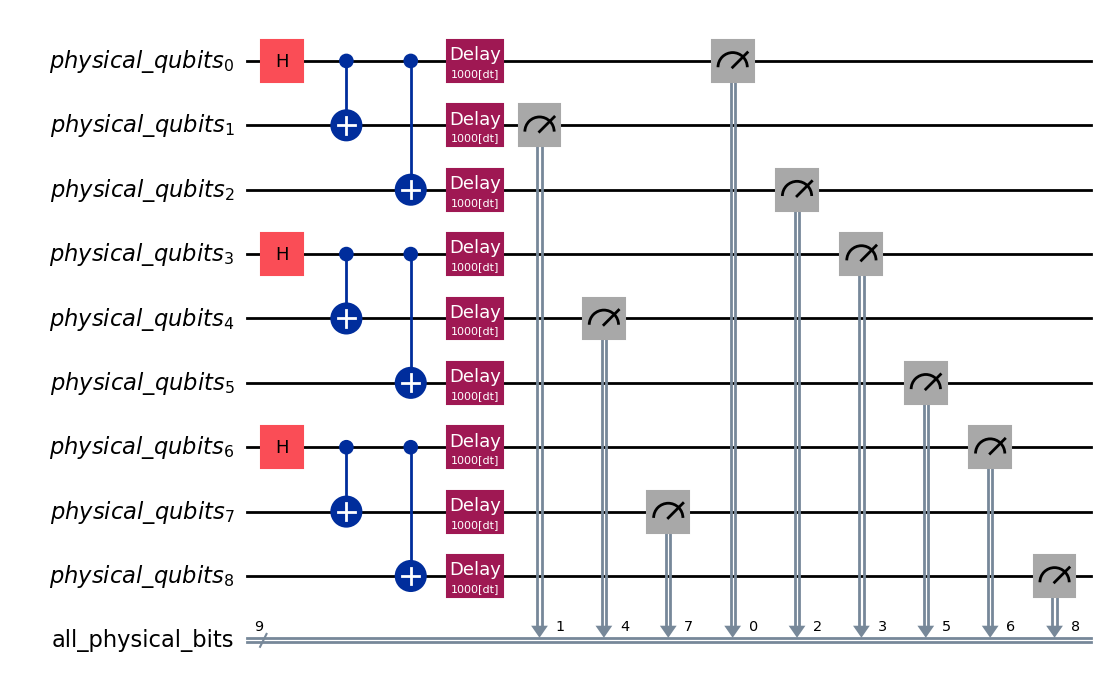

In [36]:
def load_circuit(delay):
    qc = ShorCodeCircuit(1)

    # qc.encode()
    qc.encode(initial_state = '0')

    for i in range(qc.physical_qubit_count):
        qc.append_unitary_error(Delay(delay), i)
    
    qc.measure_all(basis='all')

    return qc

qc = load_circuit(1000)
qc.draw_physical_circuit('mpl')

In [37]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_sherbrooke")

In [38]:
phy_qc = qc.physical_quantum_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_quantum_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")


Circuit Depth: 5
Transpiled Circuit Depth: 11


In [39]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.222 ns


In [40]:
# t_array = [t*10_000 for t in range(0, 21)]
# t_array = [t*20_000 for t in range(0, 3)]
t_array = [t*90_000 for t in range(0, 5)]
# t_array = [0]
print([round(t*dt * 10**(-3), 3) for t in t_array])

[0.0, 20.0, 40.0, 60.0, 80.0]


In [ ]:
# circuits = []

# for t in t_array:

#     qc = load_circuit(t)

#     # isa_circuit = get_transpile(qc.physical_quantum_circuit, backend, iterations=3,
#     #                             initial_layout=[26, 16, 27, 100, 101, 110, 124, 123, 125]
#     #                             # min_depth = 11
#     #                             )
    
#     isa_circuit = transpile(qc.physical_quantum_circuit, backend, scheduling_method="asap", optimization_level=3,
#                             initial_layout=[45, 46, 44, 124, 125, 123, 100, 110, 101]
#                             )

#     circuits.append(isa_circuit)

#     print(f"Circuit Depth: {circuits[-1].depth()}")
#     print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} us")
#     print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")
#     print(get_layout(circuits[-1], qb_len=9))
#     print('\n')

Circuit Depth: 10
Delay Duration: 0.0 us
Total Duration: 2.453 us
[45, 46, 44, 124, 125, 123, 100, 110, 101]


Circuit Depth: 11
Delay Duration: 20.0 us
Total Duration: 22.453 us
[45, 46, 44, 124, 125, 123, 100, 110, 101]


Circuit Depth: 11
Delay Duration: 40.0 us
Total Duration: 42.453 us
[45, 46, 44, 124, 125, 123, 100, 110, 101]


Circuit Depth: 11
Delay Duration: 60.0 us
Total Duration: 62.453 us
[45, 46, 44, 124, 125, 123, 100, 110, 101]


Circuit Depth: 11
Delay Duration: 80.0 us
Total Duration: 82.453 us
[45, 46, 44, 124, 125, 123, 100, 110, 101]




C:\Users\marzu\AppData\Local\Temp\ipykernel_30620\2098419235.py:20: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")
C:\Users\marzu\AppData\Local\Temp\ipykernel_30620\2098419235.py:20: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")
C:\Users\marzu\AppData\Local\Temp\ipykernel_30620\2098419235.py:20: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")
C:\Users\marzu\AppData\Local\Temp\ipykernel_30620\2098419235.py:20: Deprecat

In [51]:
simulation_result = sampler_simulation(qc.physical_quantum_circuit, 51200)

print(f"{simulation_result.data[qc.physical_bit_register.name].get_counts()}")

# for key, value in extract_simulation_results([simulation_result]).items():
#     print(key, *value, sep='\n\t')
        


{'000000111': 6311, '000000000': 6333, '000111000': 6554, '111111000': 6361, '111000000': 6515, '000111111': 6349, '111111111': 6349, '111000111': 6428}


In [53]:
sampler = SamplerV2(backend=backend)
shots = 51200
# job = sampler.run(circuits, shots=shots)
# job = sampler.run(circuits[:1], shots=shots)
# job = service.job('cyan1g67v8tg008fwx5g') # shots = 100, t_array = [t*10_000 for t in range(0, 21)]
# job = service.job('cyqcpehmjve0008tcm30') # shots = 51200, t_array = [0] -> se detecta error en qubit 4
# job = service.job('cyqcqpp1j2e0008kvb5g') # shots = 51200, t_array = [t*20_000 for t in range(0, 3)] -> cancelado!
# job = service.job('cytdm4gy2gd000882s50') # shots = 51200, t_array = [0], iteracion 2
# job = service.job('cytdy08jj6dg008g0xq0') # probar sherbrooke, shots = 51200, t_array = [0] -> se detectan errores en qubits 1 y 4
# job = service.job('cytdytb38jq0008xthwg') # probar sherbrooke, shots = 51200, t_array = [0], iteracion 2
# job = service.job('cytef1438jq0008xtkr0') # probar sherbrooke, shots = 51200, t_array = [0], iteracion 3
# job = service.job('cz4fzpph0kc00088vwqg') # sherbrooke, shots = 51200, t_array = [t*90_000 for t in range(0, 5)] -> horrible
job = service.job('cz4j4x3kvm9g008g6myg') # encoder particular




pub_result = job.result()

In [54]:
states = [bin(i)[2:].zfill(9) for i in range(2**9)]

results = extract_results_IBM(pub_result, type='percentage')[qc.physical_bit_register.name]


In [55]:

delays = [round(t*dt/1000) for t in t_array]
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(results[i][s]*shots/100) for s in states], sep='\t\t')

 delay (μs)	 000000000	 000000001	 000000010	 000000011	 000000100	 000000101	 000000110	 000000111	 000001000	 000001001	 000001010	 000001011	 000001100	 000001101	 000001110	 000001111	 000010000	 000010001	 000010010	 000010011	 000010100	 000010101	 000010110	 000010111	 000011000	 000011001	 000011010	 000011011	 000011100	 000011101	 000011110	 000011111	 000100000	 000100001	 000100010	 000100011	 000100100	 000100101	 000100110	 000100111	 000101000	 000101001	 000101010	 000101011	 000101100	 000101101	 000101110	 000101111	 000110000	 000110001	 000110010	 000110011	 000110100	 000110101	 000110110	 000110111	 000111000	 000111001	 000111010	 000111011	 000111100	 000111101	 000111110	 000111111	 001000000	 001000001	 001000010	 001000011	 001000100	 001000101	 001000110	 001000111	 001001000	 001001001	 001001010	 001001011	 001001100	 001001101	 001001110	 001001111	 001010000	 001010001	 001010010	 001010011	 001010100	 001010101	 001010110	 001010111	 001011000	 00101100

In [56]:
valid_states = ['000000111', '111000111', '111000000', '111111000', '000111111', '111111111', '000000000', '000111000']

In [71]:
print_order_results(results[0], limit=32, valid_states=valid_states)

state: result, HD, error positions
111000111: 11.09%, 0, [[]]
111000000: 10.598%, 0, [[]]
111111111: 10.371%, 0, [[]]
111111000: 10.049%, 0, [[]]
000000111: 9.949%, 0, [[]]
000000000: 9.799%, 0, [[]]
000111000: 9.371%, 0, [[]]
000111111: 9.348%, 0, [[]]
010000111: 1.227%, 1, [[1]]
010111111: 1.209%, 1, [[1]]
010000000: 1.148%, 1, [[1]]
010111000: 1.135%, 1, [[1]]
111000110: 0.818%, 1, [[8]]
111111110: 0.785%, 1, [[8]]
000000110: 0.771%, 1, [[8]]
000111110: 0.734%, 1, [[8]]
101000111: 0.607%, 1, [[1]]
101000000: 0.559%, 1, [[1]]
101111111: 0.541%, 1, [[1]]
101111000: 0.518%, 1, [[1]]
111000010: 0.285%, 1, [[7]]
111000101: 0.27%, 1, [[7]]
111000001: 0.258%, 1, [[8]]
111111010: 0.256%, 1, [[7]]
000111101: 0.242%, 1, [[7]]
000000101: 0.227%, 1, [[7]]
000111001: 0.225%, 1, [[8]]
000000001: 0.221%, 1, [[8]]
000000010: 0.219%, 1, [[7]]
000111010: 0.217%, 1, [[7]]
111111001: 0.217%, 1, [[8]]
111111101: 0.205%, 1, [[7]]


TVD

In [58]:
alpha = generate_uniform_distribution(9, valid_states)


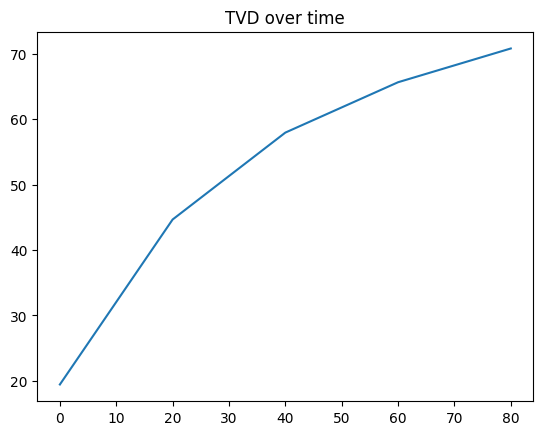

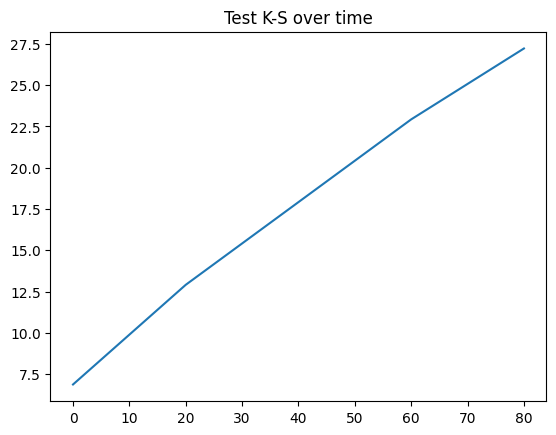

In [59]:
simple_plot(delays, [calculate_tvd(r, alpha)*100 for r in results], title="TVD over time")
simple_plot(delays, [calculate_test_ks(r, alpha)*100 for r in results], title="Test K-S over time")


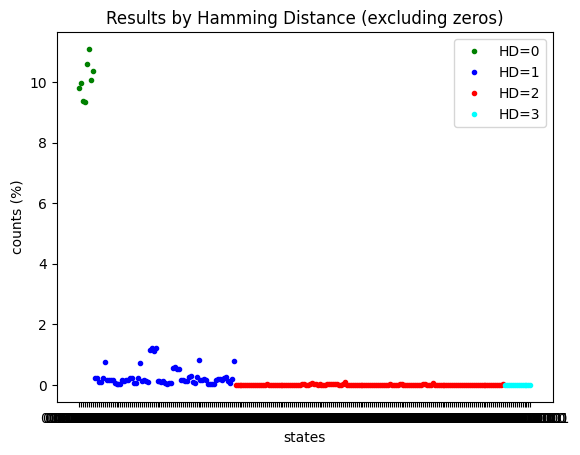

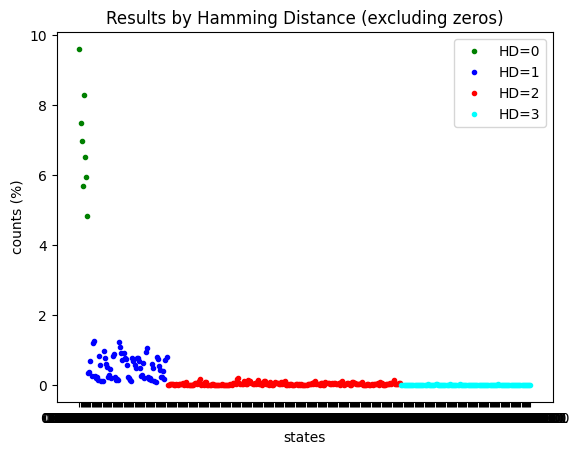

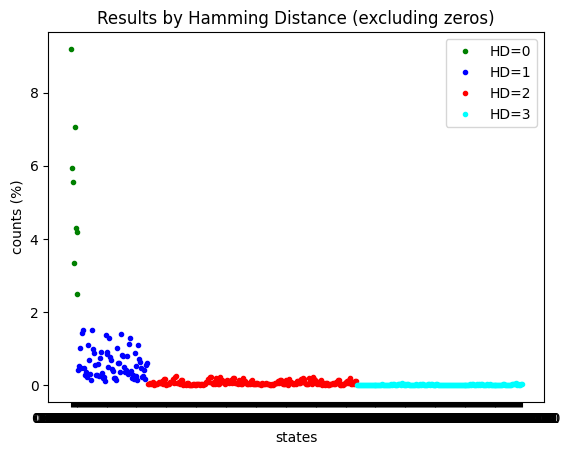

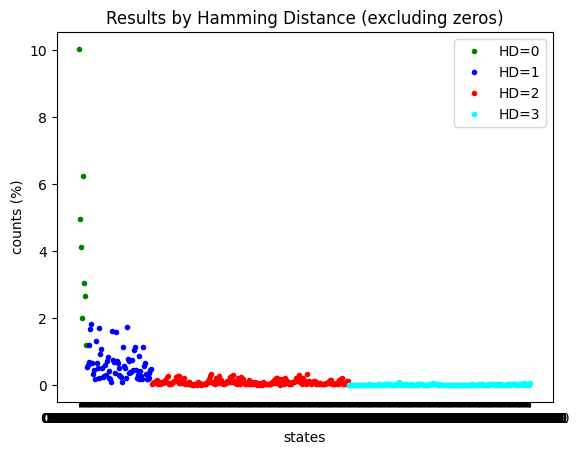

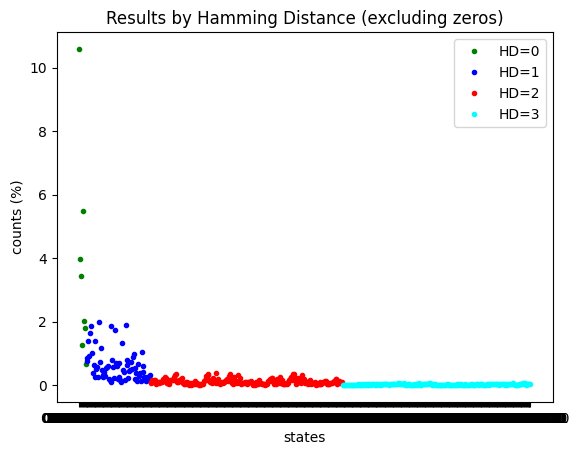

In [61]:
for r in results:
    plot_results_hamming_distance(r, qb_len=9, valid_states=valid_states, integer_representation=False, omit_zeros=True)

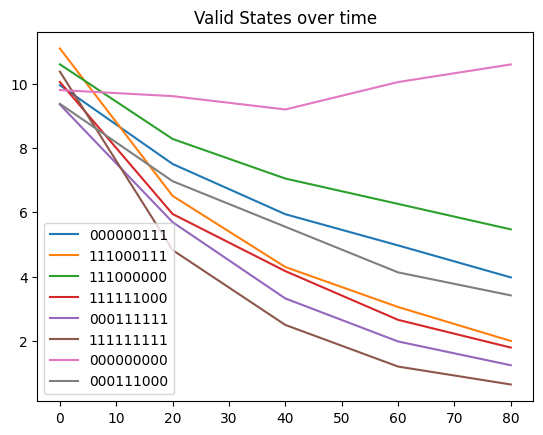

In [74]:
simple_plot(delays, [[r[s] for r in results] for s in valid_states], labels=valid_states, title="Valid States over time")

In [64]:
estimated_snr = calculate_snr(results[0], valid_states)
print(estimated_snr)

261.31128091695155


In [65]:
noise_alpha = generate_uniform_distribution(9, valid_states, snr=estimated_snr)
noise_tvd = calculate_tvd(r, noise_alpha, percentage=True)
print(f"TVD with estimated SNR: {round(noise_tvd*100,2)}%")

# snrs = [130.1, 130.2, 130.3, 130.4, 130.5, 130.6, 130.7, 130.8, 130.9, 131.0, 131.1, 131.2, 131.3, 131.4, 131.5, 131.6, 131.7, 131.8, 131.9, 132.0]
# snr = 130.8
# tvd = calculate_tvd(r, generate_uniform_distribution(9, valid_states, snr=snr), percentage=True)
# print(f"SNR: {snr}, TVD: {round(tvd*100,2)}%")

# plt.plot(snrs, [calculate_tvd(r, generate_uniform_distribution(9, valid_states, snr=snr), percentage=True) for snr in snrs])

# # plt.axvline(x=80)
# plt.show()


TVD with estimated SNR: 56.93%


In [66]:
noise_alpha = generate_uniform_distribution(9, valid_states, snr=estimated_snr)
noise_tvd = calculate_tvd(alpha, noise_alpha)
print(f"ideal TVD with estimated SNR: {round(noise_tvd*100,2)}%")

ideal TVD with estimated SNR: 49.5%


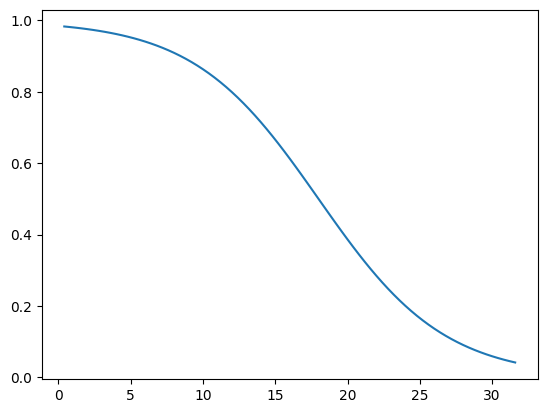

In [67]:
snrs = [10**(i/25) for i in range(1, 80)]

plt.plot(10*np.log10(snrs), [calculate_tvd(alpha, generate_uniform_distribution(9, valid_states, snr=snr), percentage=False)
                 for snr in snrs])

# plt.axvline(x=80)
plt.show()

In [68]:
# for r in results:
#     plot_distribution_functions(r, alpha, style='-')

In [69]:
print('test K-S:', calculate_test_ks(results[0], alpha, percentage=True))

test K-S: 0.0687890625


In [78]:
for i in range(len(results)):
    print(delays[i], ':', round(calculate_tvd(results[i], alpha, percentage=True)*100,2))

0 : 19.43
20 : 44.67
40 : 57.96
60 : 65.67
80 : 70.83


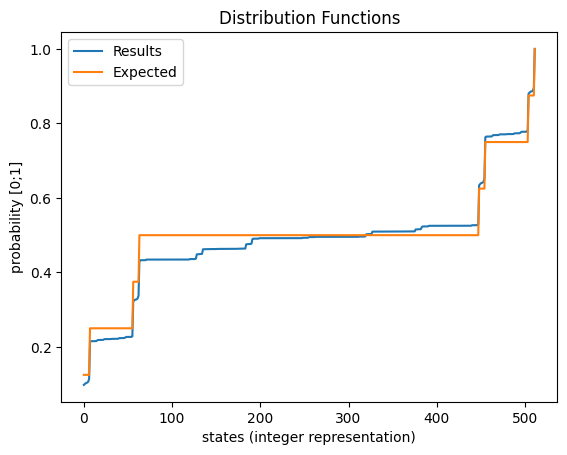

In [75]:
plot_distribution_functions(results[0], alpha)